<a href="https://colab.research.google.com/github/romybompart/SelfDrivingCar_Learning/blob/master/SelfDrivingCar_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/romybompart/SelfDrivingCar_Learning.git

fatal: destination path 'SelfDrivingCar_Learning' already exists and is not an empty directory.


In [0]:
!ls SelfDrivingCar_Learning/data1

driving_log.csv  IMG


In [0]:
#!pip3 install imgaug
#!pip3 install pillow --upgrade
#!pip install albumentations --upgrade
#!pip install --upgrade scikit-image
#!pip install pandas --upgrade

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import keras 
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

%matplotlib inline

In [0]:
data_path_name = 'SelfDrivingCar_Learning/data1'
csv_file_name = 'driving_log.csv'
img_folder_name = 'IMG'

In [0]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(data_path_name,csv_file_name), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

center  \
0  C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\center_2019_02_24_14_56_18_478.jpg   
1  C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\center_2019_02_24_14_56_18_579.jpg   
2  C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\center_2019_02_24_14_56_18_683.jpg   
3  C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\center_2019_02_24_14_56_18_784.jpg   
4  C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\center_2019_02_24_14_56_18_887.jpg   

                                                                                                                                                                          left  \
0   C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\left_2019_02_24_14_56_18_478.jpg   
1   C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\left_2019_02_24_14_56_18_579.jpg   
2   C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\left_2019_02_24_14_56_18_683.jpg   
3   C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\left_2019_02_24_14_56_18_784.jpg   
4   C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\left_2019_02_24_14_56_18_887.jpg   

                                                                                                                                                                          right  \
0   C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\right_2019_02_24_14_56_18_478.jpg   
1   C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\right_2019_02_24_14_56_18_579.jpg   
2   C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\right_2019_02_24_14_56_18_683.jpg   
3   C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\right_2019_02_24_14_56_18_784.jpg   
4   C:\Users\Romy1\Documents\Documentos Romy\Proyectos Personales\Self_Driving_Car_Course\Self_Driving_Data\SelfDrivingCar_Learning\data1\IMG\right_2019_02_24_14_56_18_887.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0        0.000078  
1  0.0       0.0       0        0.000078  
2  0.0       0.0       0        0.000079  
3  0.0       0.0       0        0.000079  
4  0.0       0.0       0        0.000080

In [0]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

In [0]:
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head(10)

center                              left  \
0  center_2019_02_24_14_56_18_478.jpg  left_2019_02_24_14_56_18_478.jpg   
1  center_2019_02_24_14_56_18_579.jpg  left_2019_02_24_14_56_18_579.jpg   
2  center_2019_02_24_14_56_18_683.jpg  left_2019_02_24_14_56_18_683.jpg   
3  center_2019_02_24_14_56_18_784.jpg  left_2019_02_24_14_56_18_784.jpg   
4  center_2019_02_24_14_56_18_887.jpg  left_2019_02_24_14_56_18_887.jpg   
5  center_2019_02_24_14_56_18_990.jpg  left_2019_02_24_14_56_18_990.jpg   
6  center_2019_02_24_14_56_19_095.jpg  left_2019_02_24_14_56_19_095.jpg   
7  center_2019_02_24_14_56_19_197.jpg  left_2019_02_24_14_56_19_197.jpg   
8  center_2019_02_24_14_56_19_304.jpg  left_2019_02_24_14_56_19_304.jpg   
9  center_2019_02_24_14_56_19_407.jpg  left_2019_02_24_14_56_19_407.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2019_02_24_14_56_18_478.jpg  0.0       0.0       0        0.000078  
1  right_2019_02_24_14_56_18_579.jpg  0.0       0.0       0        0.000078  
2  right_2019_02_24_14_56_18_683.jpg  0.0       0.0       0        0.000079  
3  right_2019_02_24_14_56_18_784.jpg  0.0       0.0       0        0.000079  
4  right_2019_02_24_14_56_18_887.jpg  0.0       0.0       0        0.000080  
5  right_2019_02_24_14_56_18_990.jpg  0.0       0.0       0        0.000078  
6  right_2019_02_24_14_56_19_095.jpg  0.0       0.0       0        0.000079  
7  right_2019_02_24_14_56_19_197.jpg  0.0       0.0       0        0.000084  
8  right_2019_02_24_14_56_19_304.jpg  0.0       0.0       0        0.000078  
9  right_2019_02_24_14_56_19_407.jpg  0.0       0.0       0        0.000079

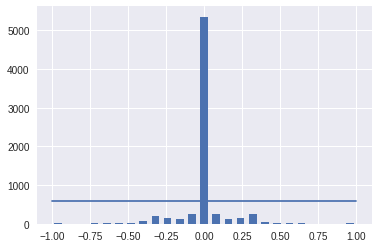

In [0]:
num_bins = 25
samples_per_bin = 600 #threshold of data that we want to keep
hist, bins = np.histogram(data['steering'],num_bins)
center = (bins[:-1] + bins[1:])*0.5
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [0]:
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [0]:
print ('total data:', len(data))

remove_list = [] # samples that we want to remove
for j in range( num_bins ): 
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i) #points to an specific angle from the steering list
  list_ = shuffle(list_) # suffle because the data is ordered from the beginning
                         # of the trainning, then if we need to cut the data
                         #it will be skipping the last part of the trainning
                         #we don't want to loss the data at the end of the track
                         
  list_ = list_[samples_per_bin:] #cut the list beyond the threshold samples_per_bin
  remove_list.extend(list_) # extend/concatenate the list elements into remove_list 

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace = True)
print ('remaining', len(data))

total data: 7169
removed: 4753
remaining 2416


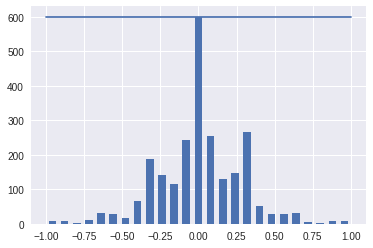

In [0]:
hist, bins_ = np.histogram(data['steering'], num_bins)
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [0]:
print(data.iloc[1])

center      center_2019_02_24_14_56_19_815.jpg
left        left_2019_02_24_14_56_19_815.jpg  
right       right_2019_02_24_14_56_19_815.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       7.78378e-05                       
Name: 13, dtype: object


In [0]:
def load_img_steering(path, df):
  image_path = []
  steering = []
  for i in range ( len(df)):
    #selecting the data from pands based on the integer index location
    indexed_data = df.iloc[i]
    #from the data.iloc you can see the center as 0, left as 1 and right as 2
    #steering as 3
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    #image path is saved in the image_path list but no space are allowed
    #this is why strip is called
    image_path.append(os.path.join(path,center.strip())) 
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)

  return image_paths, steerings

In [0]:
image_paths, steerings = load_img_steering(data_path_name + '/' + img_folder_name, data)


In [0]:
xtrain, xvalid, ytrain, yvalid = train_test_split(image_paths, steerings, test_size = 0.2, random_state = 6)

In [0]:
print ( "Trainnig samples: {} \n Valid samples: {}".format(len(xtrain),len(xvalid)))

Trainnig samples: 1932 
 Valid samples: 484


Text(0.5, 1.0, 'Validation Set')

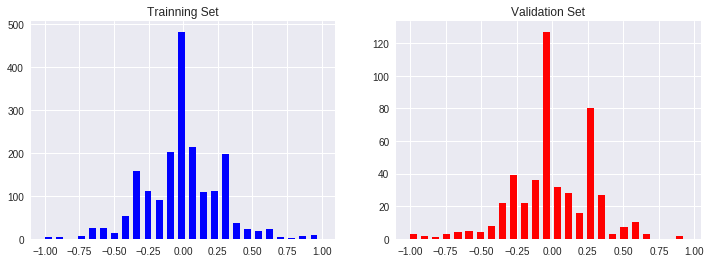

In [0]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(12,4))
axs[0].hist(ytrain,bins=num_bins,width=0.05, color='blue')
axs[0].set_title("Trainning Set")

axs[1].hist(yvalid,bins=num_bins,width=0.05, color='red')
axs[1].set_title("Validation Set")

In [0]:
def zoom(image):
  #Affine transformation to presever data
  #Zoom in will be from 1 ( no zoom) to 50% of zoom of the image
  #it will be a random data
  zoom = iaa.Affine(scale=(1,1.5)) 
  image = zoom.augment_image(image)#calling the zoom in function
  return image

Text(0.5, 1.0, 'Zoomed Image')

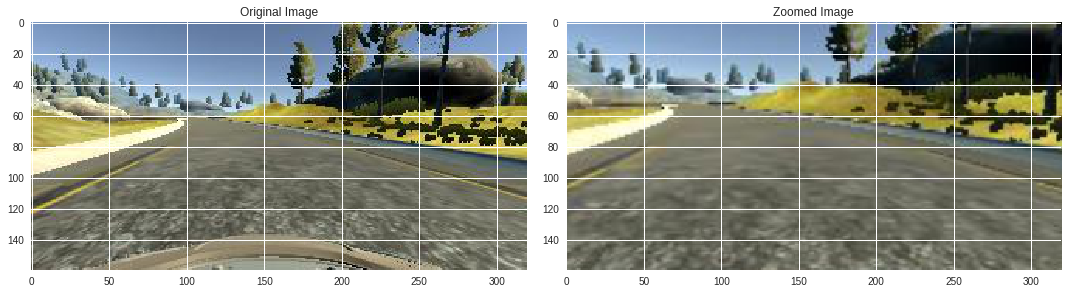

In [0]:
image = image_paths[random.randint(0, 1000)]
original_image = npimg.imread(image)
zoomed_image = zoom(original_image)

fig, axis = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()

axis[0].imshow(original_image)
axis[0].set_title('Original Image')

axis[1].imshow(zoomed_image)
axis[1].set_title('Zoomed Image')

In [0]:
def pan(image):
  pan = iaa.Affine(translate_percent={'x': (-0.1,0.1), 'y': (-0.1,0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

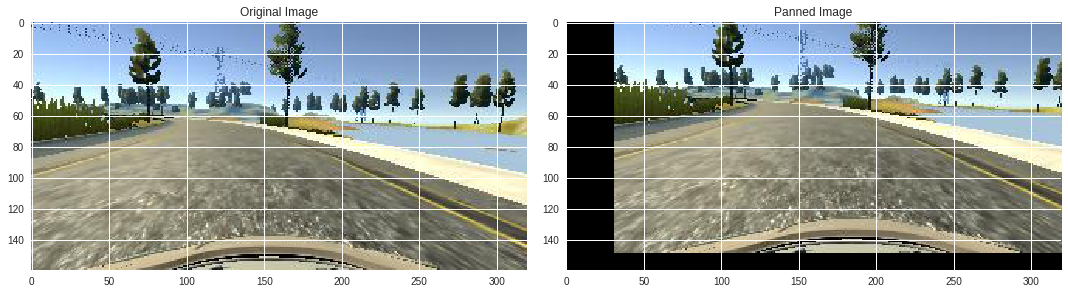

In [0]:
image = image_paths[random.randint(0, 1000)]
original_image = npimg.imread(image)
pan_image = pan(original_image)

fig, axis = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()

axis[0].imshow(original_image)
axis[0].set_title('Original Image')

axis[1].imshow(pan_image)
axis[1].set_title('Panned Image')

In [0]:
def Brigthness(image):
  bright = iaa.Multiply((0.2, 1.2))
  image = bright.augment_image(image)
  return image

Text(0.5, 1.0, 'Brightness Image')

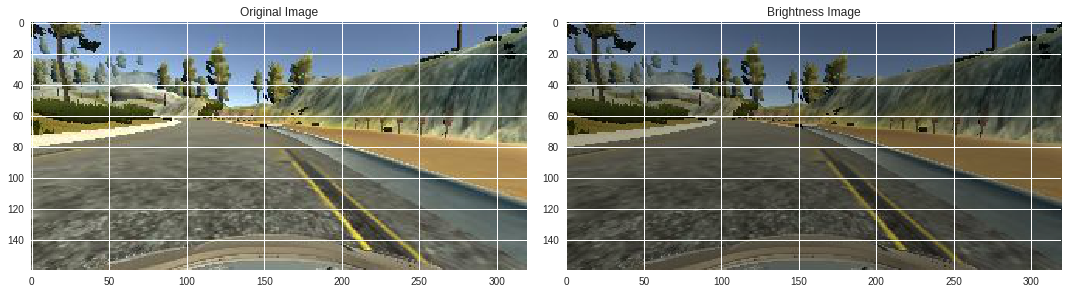

In [0]:
image = image_paths[random.randint(0, 1000)]
original_image = npimg.imread(image)
brg_image = Brigthness(original_image)

fig, axis = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()

axis[0].imshow(original_image)
axis[0].set_title('Original Image')

axis[1].imshow(brg_image)
axis[1].set_title('Brightness Image')

In [0]:
def flipping(image,steering):
  image = cv2.flip(image,1) #horizontal flip
  steeringx = -steering
  return image, steeringx

Text(0.5, 1.0, 'Flipped Image - Steering angle:0.2970006')

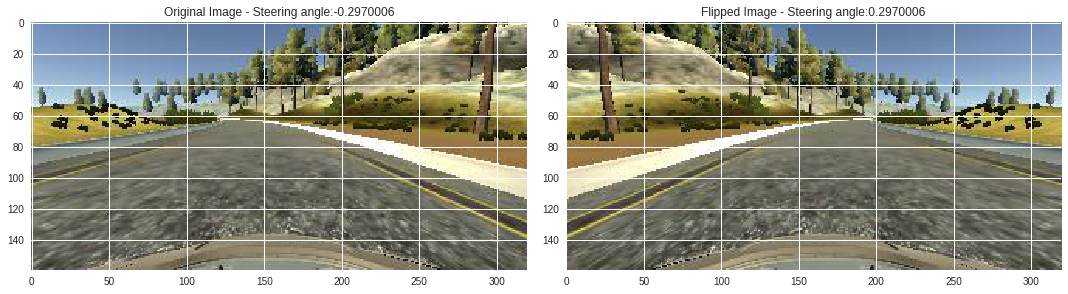

In [0]:
random_index = random.randint(0,1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = npimg.imread(image)
flipped_image , flipped_steering = flipping(original_image, steering_angle)

fig, axis = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()

axis[0].imshow(original_image)
axis[0].set_title('Original Image - ' + 'Steering angle:' + str(steering_angle))

axis[1].imshow(flipped_image)
axis[1].set_title('Flipped Image - ' + 'Steering angle:' + str(flipped_steering))



In [0]:
def random_augment(image, steering_angle):
  image = npimg.imread(image)
  if ( np.random.rand() < 0.5 ):
    image = zoom(image)
  if ( np.random.rand() < 0.5 ):
    image = pan(image)
  if ( np.random.rand() < 0.5 ):
    image = Brigthness(image)
  if ( np.random.rand() < 0.5 ):
    image, steering_angle = flipping(image, steering_angle)
    
  return image, steering_angle
    

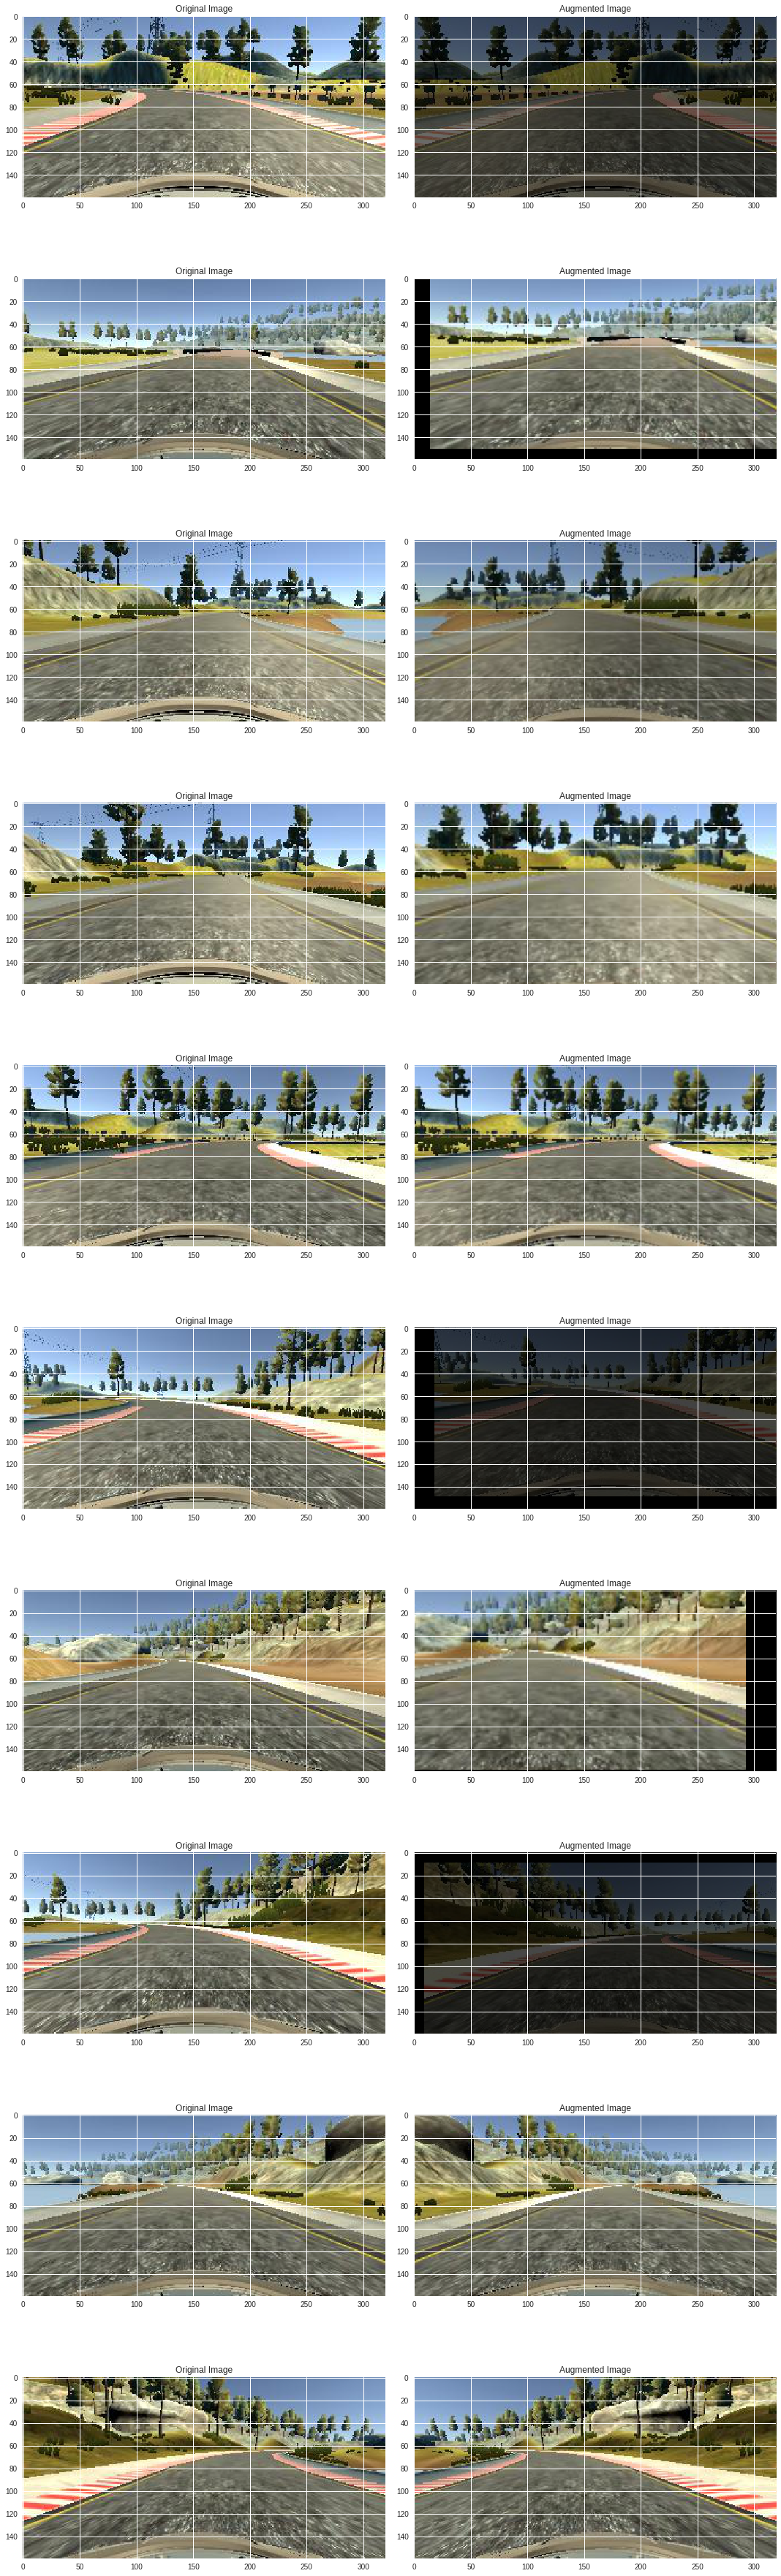

In [0]:
ncol = 2
nrow = 10

fig, axis = plt.subplots(nrow,ncol,figsize = (15,50))
fig.tight_layout()

for i in range(10):
  rand_index = random.randint(0, len(image_paths)-1)
  random_img = image_paths[rand_index]
  random_steering = steerings[rand_index]
  
  original_image = npimg.imread(random_img)
  aug_img, aug_steering = random_augment(random_img, random_steering)

  axis[i][0].imshow(original_image)
  axis[i][0].set_title('Original Image')
  
  axis[i][1].imshow(aug_img)
  axis[i][1].set_title('Augmented Image')
  

In [0]:
def img_preprocess(img):
  #img = npimg.imread(img_path)
  #cropping the image
  img = img[60:135,:,:]
  #YUV Color space to use in the nvidea model
  #3 channels Y luminosity, UV chrominance (color)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  #gaussian blur useful to smooth the image by reducing noise
  #it uses a kernel and the deviation of the kernel
  img = cv2.GaussianBlur(img, (3,3), 0)
  #resizing the image to have the same input as the nvidea model
  img = cv2.resize(img, (200,66))
  #normalization 
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

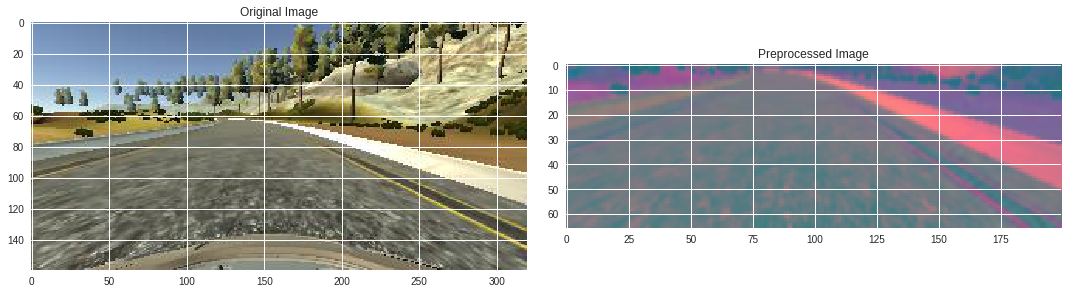

In [0]:
#to verify the img_process function
image = image_paths[100]
original_image = npimg.imread(image)
pp_image = img_preprocess(original_image)

fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(pp_image)
axs[1].set_title('Preprocessed Image')

In [0]:
def batch_generator(image_paths, steering_aug, batch_size, istrainnig):
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      rand_index = random.randint(0, len(image_paths)-1)
      
      if istrainnig:
        img, steering = random_augment(image_paths[rand_index], steering_aug[rand_index])
      else:
        img = npimg.imread(image_paths[rand_index])
        steering = steering_aug[rand_index]
        
      
      img = img_preprocess(img)
      batch_img.append(img)
      batch_steering.append(steering)
      
    yield (np.asarray(batch_img), np.asarray(batch_steering))
    

In [0]:
print ( xtrain[0])

SelfDrivingCar_Learning/data1/IMG/center_2019_02_24_15_01_07_524.jpg


In [0]:
print( xvalid[0])

SelfDrivingCar_Learning/data1/IMG/center_2019_02_24_14_56_47_256.jpg


Text(0.5, 1.0, 'xvalid Image')

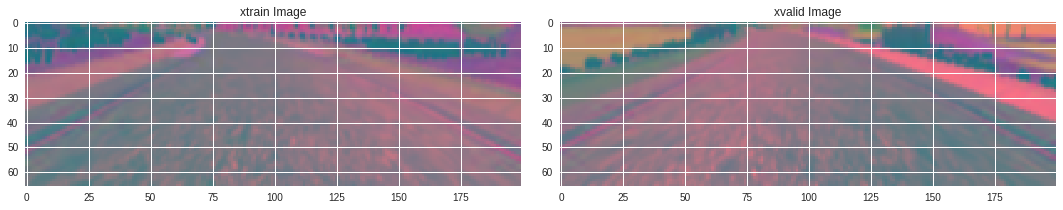

In [0]:
xtrain_gen, ytrain_gen = next(batch_generator(xtrain,ytrain,1,1))
xvalid_gen, yvalid_gen = next(batch_generator(xvalid,yvalid,1,0))

fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(xtrain_gen[0])
axs[0].set_title('xtrain Image')

axs[1].imshow(xvalid_gen[0])
axs[1].set_title('xvalid Image')




In [0]:
#xtrain = np.array(list(map(img_preprocess,xtrain)))
#xvalid = np.array(list(map(img_preprocess,xvalid)))

In [0]:
#plt.imshow(xtrain[random.randint(0,len(xtrain)-1)])
#plt.axis('off')
#print(xtrain.shape)

In [0]:
print(xtrain_gen.shape)
print(ytrain.shape)

print(xvalid_gen.shape)
print(yvalid.shape)

(1, 66, 200, 3)
(1932,)
(1, 66, 200, 3)
(484,)


In [0]:
#relu activation is reliable and quick activation function.
#Normally used when the sigmoid activation function causes vanishing gradient
#But also it has shortcoming on its own, can causes dead relu, when a node of the
#neural network dies, and it only feeds a value of 0 to the node that follows it

#elu can be used to solve the dying relu problem
def nvidia_model():
  model = Sequential()
  #convolution2d 24 filters of 5x5, stride 2 pixels by 2 pixels
  model.add(Convolution2D(24,5,5, subsample=(2,2), input_shape=(xtrain_gen.shape[1],xtrain_gen.shape[2], xtrain_gen.shape[3]), activation='relu'))
  model.add(Convolution2D(36,5,5, subsample=(2,2), activation = 'elu'))
  model.add(Convolution2D(48,5,5, subsample=(2,2), activation = 'elu'))
  model.add(Convolution2D(64,3,3, activation = 'elu'))
  model.add(Convolution2D(64,3,3, activation = 'elu'))
  
  #model.add(Dropout(0.5)) #for preventing overfiting
  
  model.add(Flatten())
  model.add(Dense(100, activation = 'elu'))
  
  #model.add(Dropout(0.5))  #for preventing overfiting
  
  model.add(Dense(50, activation = 'elu'))
  
  #model.add(Dropout(0.5))  #for preventing overfiting
  
  model.add(Dense(10, activation = 'elu'))
  
  #model.add(Dropout(0.5))  #for preventing overfiting
  
  model.add(Dense(1))
  
  opt = Adam(lr=1e-4)
  model.compile(loss='mse', optimizer= opt)
  return model

In [0]:
model = nvidia_model()
print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="relu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               115300    
__________

In [0]:
#h = model.fit(xtrain,ytrain,epochs= 30, validation_data=(xvalid,yvalid), batch_size = 100, verbose= 1, shuffle=1)
#100 of images per step by giving batch_size = 100 in the batch_generator function
#and steps_per_epoch = 300, means we are going to ask for 300 times the 100 images from the batch_generator
#agumented images are 300 * 100 = 3000, but remember the dataset is less than this.

h = model.fit_generator(batch_generator(xtrain,ytrain,100,1),steps_per_epoch=300,epochs = 10, validation_data = batch_generator(xvalid,yvalid,100,0),validation_steps=200, verbose = 1,shuffle = 1)
                        
                        

Epoch 1/10
300/300 [==============================] - 160s 534ms/step - loss: 0.0643 - val_loss: 0.0476
Epoch 2/10
300/300 [==============================] - 155s 517ms/step - loss: 0.0498 - val_loss: 0.0452
Epoch 3/10
300/300 [==============================] - 156s 519ms/step - loss: 0.0465 - val_loss: 0.0411
Epoch 4/10
300/300 [==============================] - 155s 517ms/step - loss: 0.0443 - val_loss: 0.0410
Epoch 5/10
300/300 [==============================] - 151s 504ms/step - loss: 0.0422 - val_loss: 0.0410
Epoch 6/10
300/300 [==============================] - 152s 507ms/step - loss: 0.0405 - val_loss: 0.0407
Epoch 7/10
300/300 [==============================] - 151s 503ms/step - loss: 0.0397 - val_loss: 0.0386
Epoch 8/10
300/300 [==============================] - 151s 504ms/step - loss: 0.0391 - val_loss: 0.0379
Epoch 9/10
300/300 [==============================] - 151s 503ms/step - loss: 0.0395 - val_loss: 0.0378
Epoch 10/10
300/300 [==============================] - 151s 505m

Text(0.5, 0, 'epoch')

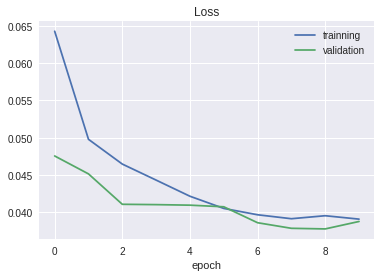

In [0]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['trainning', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [0]:
model.save('model.h5')

In [0]:
!ls 

model.h5  sample_data  SelfDrivingCar_Learning


In [0]:
from google.colab import files
files.download('model.h5')